<a href="https://colab.research.google.com/github/aeksei/PY200_Spring_2021/blob/master/lesson_3/lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На прошлом занятии мы изучили технические особенности внутренней организации классов в Python. Атрибуты и методы объектов и классов, статичсекие методы и свойства.  

Абстракция — отделение концепции от ее экземпляра.

Парадигма ООП держится на трех столпах:
- **Инкапсуляция** — упаковка данных и методов для их обработки вместе, т. е. в классе. И при необходимости разграничения доступа к ним.
- **Наследование** — способность объекта или класса базироваться на другом объекте или классе. Это главный механизм для повторного использования кода.
- **Полиморфизм** — реализация задач одной и той же идеи разными способами.



# Объектно-ориентированное программирование (ООП) на языке Python. Инкапсуляция

**Инкапсуляция** — упаковка данных и методов для их обработки вместе, т. е. в классе. И при необходимости разграничения доступа к ним.

В Python инкапсуляция реализуется как на уровне классов, так и объектов. (см. [Атрибуты и методы](https://colab.research.google.com/drive/1VsZ2IQCsVY2TCw6hp1CVQ3z3MrVXW7zb#scrollTo=Rgq0ljPKDazM))

Например, если надо проверять присваиваемое полю значение на корректность, то делать это каждый раз в основном коде программы будет неправильным. 
```python
class Date:
    def __init__(self, day: int):
        if not isinstance(day, int):  # нужна проверка на int
            raise TypeError()
        self.day = day


date = Date(28)
new_date = 26
if isinstance(day, int) and 0 < new_date <= 31:  # проверка даты вне класса
    date.day = new_date 

try:  # проверка сложения дат лежит вне класса - плохо :(
    date.day += 5
except TypeError:
    ...
```

Проверочный код должен быть помещен в метод, который получает данные для присвоения полю.   

А само поле должно быть **закрыто** для доступа из вне класса. В этом случае ему невозможно будет присвоить недопустимое значение.

## Реализация инкапсуляции в Python

В Python нет 100% возможности закрыть доступ к атрибутам и методам из вне, хотя существует способ ее имитировать.

Пользователю вашего кода необходимо **объяснить**, что нельзя напрямую обращаться с некоторым атрибутам и методам вашего класса. 

Делается это приставкой **двух нижних подчеркивания** перед названием атрибута.

In [1]:
class Date:
    def __init__(self, day: int, month: int):
        self.day = day  # публичный атрибут
        self.__month = month  # непубличный атрибут, потому что перед названием стоят два нижних подчеркивания 

date = Date(day=10, month=20)

In [2]:
print(date.day)  # 10

10


In [3]:
print(date.month)  # AttributeError

AttributeError: ignored

In [4]:
print(date.__month)  # AttributeError

AttributeError: ignored

При получении доступа **вне класса** к атрибуту **`__month`** будет сгенерировано исключение `AttributeError`.

In [12]:
# ещё раз реализуем класса Date, вспомним свойства с учетом инкапсуляции
# date - read only
class Date:
    def __init__(self, day: int, month: int):
        self.__day = day  # публичный атрибут
        self.__month = month  # непубличный атрибут, потому что перед названием стоят два нижних подчеркивания 

    @property
    def day(self):
        return self.__day

    @day.setter
    def day(self, value):
        self.is_valid_date()
        self.__day = value

    @property
    def date(self):
        return f"{self.__day}-{self.__month}"


    def is_valid_date(self, day: int, month: int):
        ...


date = Date(day=10, month=20)
print(date.date)

10-20


In [11]:
date.day = 

10

In [9]:
date.month 

20

### Нельзя, но если очень хочется, то можно ...

In [14]:
class Date:
    def __init__(self, day: int, month: int):
        self.day = day  # публичный атрибут
        self.__month = month  # непубличный атрибут, потому что перед названием стоят два нижних подчеркивания 

date = Date(day=10, month=20)

In [15]:
print(date.__dict__)

{'day': 10, '_Date__month': 20}


Интерпретатор переименовал атрибут
**`__month`** следующим образом:  

***_Имя класса__название атрибута***

In [16]:
print(date._Date__month)

20


In [17]:
date._Date__month = 500
print(date._Date__month)

500


### Выводы

1. В языке Python к непубличным переменным доступ разрешён.
1. В языке Python Вы в любом случаем сможете изменить непубличные атрибуты.
1. В языке Python вы просто **предоставляете информацию** пользователю разработанного Вами класса, что данный **атрибут предназначен только для внутренней инфраструктуры класса**.
1. Вы не гарантируете, что непубличные атрибуты могут измениться в следующей версии вашего кода.
1. Инкапсулируйте все, что может изменяться.

# Объектно-ориентированное программирование (ООП) на языке Python. Наследование

**Наследование** — способность объекта или класса базироваться на другом объекте или классе. Это главный механизм для повторного использования кода.

Так или иначе мы уже сталкивались с ним, ведь **объекты наследуют атрибуты своих классов**.

In [ ]:
class Date:
    DAY_OF_MONTH = (
        (31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31),  # обычный год
        (31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)  # високосный
    )

    def print_day_of_month(self):
        print(self.DAY_OF_MONTH)


date = Date()
date.print_day_of_month()

Однако обычно под наследованием в ООП понимается **наличие классов и подклассов**.

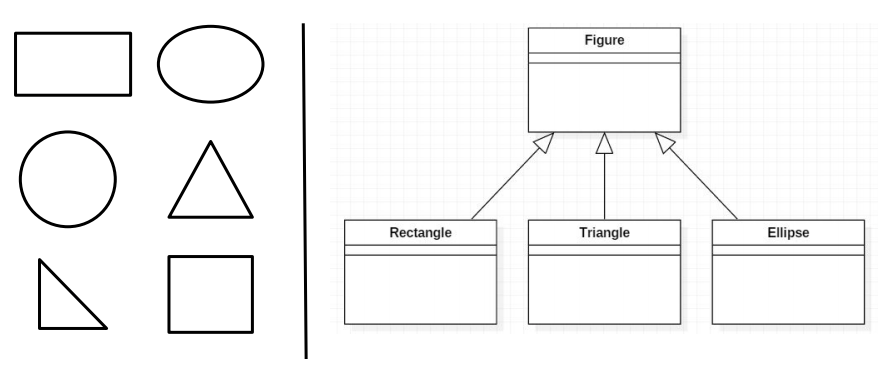

***Синтаксис наследования:***
```python
class НазваниеПодкласса(БазовыйКласс):
    ...
```
```python
class Figure:
    ...
class Rectangle(Figure):
    ...
class Triangle(Figure):
    ...
class Ellipse(Figure):
    ...
```
Класс **`Figure`** называют базовым по отношению к классам **`Rectangle`**, **`Triangle`** или **`Ellipse`**.

Классы **`Rectangle`**, **`Triangle`** или **`Ellipse`** называют целевым.

Различают одиночное и множественное наследование. Мы сегодня будем говорить про одиночное наследование.

## Методы при наследовании

Наследование - это главный механизм для **повторного использования кода**.  

Если нам не нужно изменять поведение метода в дочернем классе, то можно воспользоваться реализацией родителя.

In [26]:
class Figure:  # базовый класс
    def __init__(self, name):
        self.name = name

    def print_name(self):
        print("print_name вызвана из родительского класса")
        print(self.name)

class Rectangle(Figure):
    def __init__(self, a, b, name):
        self.a = a
        self.b = b
        self.name = name  # плохо :( повторно определяем name, дальше узнаем как от этого избавиться


rect = Rectangle(5, 10, 'rect_fig')

In [27]:
# не нужно повторно определять метод print_name, его реализация берется из родительского класса
rect.print_name()

print_name вызвана из экземпляра класса
rect_fig !!!


Поиск методов идет по цепочке ничиная с дочернего класса и поднимаясь по всем классам от которых наследовались.

Если добрались до самого базового класса и метод не найден, будет ошибка.

## Одиночное наследование, инициализация класса родителя (базового класса)

In [29]:
class Figure:
    def __init__(self):
        print(f'Вызван конструктор базового класса {self.__class__.__name__}')

class Rectangle(Figure):
    # __init__ определен
    def __init__(self, a, b):
        print(f'Вызван конструктор класса {self.__class__.__name__}')

class Triangle(Figure):
    # __init__ не определен
    ...

In [32]:
rectangle = Rectangle(5, 10) # Figure.__init__ не будет вызван

Вызван конструктор класса Rectangle


In [33]:
triangle = Triangle() # Figure.__init__ будет вызван

Вызван конструктор базового класса Triangle


Правила вызова инициализатора базового класса
1. Если метод `__init__` в производном классе не определён, то автоматически вызывается метод `__init__` базового класса.
2. Если метод `__init__` в производном классе определён, то метод `__init__` базового класса автоматически не вызывается.

## Одиночное наследование, вызов инициализатора родительского класса без аргументов

А если в дочернем классе, после переопределения метода **`__init__`** все равно необходимо вызвать конструктор базового класса?

В таком случае необходимо воспользоваться встроенной функцией **`super()`**. 

**`super()`** эквивалентно переменной `cls`, только на родительский класс.

In [36]:
class Figure:
    def __init__(self):
        print(f'Вызван конструктор базового класса {self.__class__.__name__}')

class Rectangle(Figure):
    # __init__ определен
    def __init__(self, a, b):
        super().__init__()
        print(f'Вызван конструктор класса {self.__class__.__name__}')

class Triangle(Figure):
    # __init__ не определен
    ...

In [37]:
fig = Figure()

Вызван конструктор базового класса Figure


In [38]:
rect = Rectangle(5, 10)

Вызван конструктор базового класса Rectangle
Вызван конструктор класса Rectangle


## Публичные атрибуты. Вызов инициализатора родительского класса с передачей аргументов



In [39]:
class Figure:
    def __init__(self, name=None):
        self.name = name

    def print_name(self):
        print(self.name)

fig = Figure('base_figure')

In [40]:
fig.print_name()

base_figure


In [46]:
class Rectangle(Figure):
    def __init__(self, a, b, name1=None):
        super().__init__(name=name1)
        self.a = a
        self.b = b

rect = Rectangle(5, 10, 'rect_fig')

In [47]:
rect.print_name()

rect_fig


In [48]:
rect.__dict__

{'a': 5, 'b': 10, 'name': 'rect_fig'}

Не важно с какими атрибутами вы работаете c публичными или не публичными. Всегда лучше вызывать конструктор базового класса, чтобы верно проинициализировать ваш объект после наследования.

Вы не знаете, что скрыто в конструкторе базового класса и какие действия там выполняются. Даже если и знаете, **то не нужно их повторно воспроизводить**!! Вызывайте конструктор базового класса!



## Не публичные атрибуты при наследовании.

In [53]:
class Figure:
    def __init__(self, name=None):
        self.__name = name

    def print_name(self):
        print(self.__name)

class Rectangle(Figure):
    def __init__(self, a, b, name=None):
        super().__init__(name)
        self.__a = a
        self.__b = b

rect = Rectangle(5, 10, name='Rect')

In [54]:
rect.print_name()  # AttributeError

Rect


In [55]:
rect.__dict__

{'_Figure__name': 'Rect', '_Rectangle__a': 5, '_Rectangle__b': 10}

Объект **`Rectangle`** не может найти приватный атрибут **_Figure__name**. У него есть только **_Rectangle__name**

***Непубличные атрибуты не видны в производном классе***!!!

Решение:

***Способ 1.*** Вызвать конструктор базового класса в явном виде

In [57]:
class Figure:
    def __init__(self, name=None):
        self.__name = name

    def print_name(self):
        print(self.__name)

class Rectangle(Figure):
    def __init__(self, a, b, name=None):
        super().__init__(name=name)
        self.__a = a
        self.__b = b

    def print_name(self):
        print(self.__name, "!!!")

rect = Rectangle(5, 10, 'rect_fig_from_base_class')
rect.print_name()  # rect_fig_from_base_class

AttributeError: ignored

**Минус**: 

Вы всё равно не получаете доступ к не публичному атрибуту базового класса.

***Способ 2.*** Защищённые атрибуты

In [62]:
# переопределяем метод print_name в дочернем классе
class Figure:
    def __init__(self, name=None):
        self._name = name

    def print_name(self):
        print(self._name)

class Rectangle(Figure):
    def __init__(self, a, b, name=None):
        super().__init__(name=name)
        self.__a = a
        self.__b = b

    def print_name(self):
        print(self._name, '!!!')

rect = Rectangle(5, 10, 'rect_fig_from_base_class')
rect.print_name()  # rect_fig_from_base_class

rect_fig_from_base_class !!!


In [63]:
rect.__dict__

{'_Rectangle__a': 5, '_Rectangle__b': 10, '_name': 'rect_fig_from_base_class'}

Не публичные атрибуты видны в дочерних классах, если их имена начинаются с **_ (одного нижнего подчеркивания)**.

В Python их называют атрибутами API класса. В других языках **protected** (защищённые атрибуты)

### Выводы
1. Наследование — это главный механизм для повторного использования кода.
2. Атрибуты и методы следует разделять на:
    - публичные (public) `self.name`, `self.get_name()`
    - защищеные (protected) `self._name`, `self._get_name()`
    - приватные (private) `self.__name`, `self.__get_name()`

<img src="https://drive.google.com/uc?id=1THvPeLBNl6C2dmIjUHj_DlTwQr2Xp4vf"/>

# Объектно-ориентированное программирование (ООП) на языке Python. Полиморфизм

**Полиморфизм** — реализация задач одной и той же идеи разными способами.  

В нашем случае мы будем говорить про перегрузку методов. 

**Перегрузка методов** — один из способов реализации полиморфизма, когда мы можем задать свою реализацию какого-либо метода в своём классе.

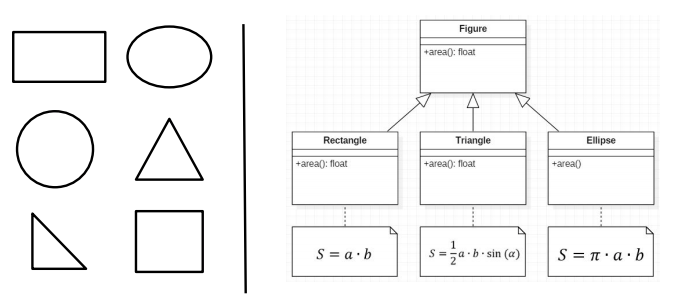

In [ ]:
class Triangle(Figure):
    def __init__(*args, **kwargs):
        super().__init__(*args, **kwargs)

    def area(self, *args):
        if len(args) == 2:
            self.__area_height(*args)
        if len(args) == 3:
            self.__area_by_angle(*args)

    def __area_by_angle(a, b, angle):
        ...

    def __area_height(a, h):
        ...

### Магические методы

Что такое магические методы? 

Они всё в объектно-ориентированном Python. Это специальные методы, с помощью которых вы можете добавить в ваши классы «магию». Они всегда обрамлены двумя нижними подчеркиваниями (например, `__init__`)

Сегодня мы рассмотри 3 блока магических методов:
- Конструирование и инициализация
- Представление своих классов
- Создание произвольных последовательностей

#### Конструирование и инициализация


К данному блоку можно отнести три метода:
- `__new__` - метод, вызывается когда создается экземпляр класса. В общем, сначала он, потом `__init__`. Применяется нечасто, например, чтобы контролировать количество созданных экземпляров.
- `__init__` - Инициализатор класса.
- `__del__` - Деструктор. Вызывается при удаленни экземпляра класса. Изменять нужно с осознанием дела. Тоже редко используется

#### Строковые представления: `__repr__` и `__str__`

Оба этих метода играют важную роль в создании правильных строковых представлений для пользовательского класса. Перед тем как рассмотреть их более подробно, давайте разберем то, с чем дальше на протяжении **нескольких лекций и практик** будем работать.

Для разбора магических метод, возьмем новую структуру данных, под названием **связанный список**. 

Не волнуйтесь, если вы не проходили курс PY111, мы будем разбирать её в первый раз.

**Линейный однонаправленный список** — это структура данных, состоящая из *элементов одного типа*, связанных между собой последовательно посредством указателей. 

![linkedlist](https://metanit.com/sharp/algoritm/pics/linkedlist1.png)

Здесь ссылка в каждом узле указывает на следующий узел в списке. В односвязном списке можно передвигаться только в сторону конца списка. Узнать адрес предыдущего элемента, опираясь на содержимое текущего узла, невозможно.

Для связного списка:
- Каждый элемент списка имеет указатель на следующий элемент. 
- Последний элемент списка указывает на NULL.
- Элемент, на который нет указателя, является первым (головным) элементом списка.

In [77]:
class Node:
    """Класс, описывающий элементы "одного типа" (узлы), последовательно связанные между собой."""
    def __init__(self, data, next_=None):
        self.data  = data
        self.next = next_

In [78]:
node = Node(5)
print(node)

In [79]:
repr(node)

'<__main__.Node object at 0x7f9f6ab53710>'

 ```python
def __repr__(self):
    ...
```
Определяет поведение функции `repr()`, вызыванной для экземпляра вашего класса. 

Метод должен возвращать строку, показывающую, как может быть создан экземпляр.


In [87]:
# определение метода __repr__
class Node:
    """Класс, описывающий элементы "одного типа" (узлы), последовательно связанные между собой."""
    def __init__(self, data, next_=None):
        self.data  = data
        self.next = next_
    
    def __repr__(self):
        print('Вызван repr')
        return f"{self.__class__.__name__}({self.data}, {self.next})"

`__repr__` вызывается если не определен `__str__`, например для функции print()

In [88]:
# print(Node)
node = Node(5)
print(node)

Вызван repr
Node(5, None)


In [74]:
new_node = Node(5, None)
print(new_node)

Вызван repr
Node(5, None)


In [75]:
repr(new_node)

Вызван repr


'Node(5, None)'

In [76]:
new_node

Вызван repr


Node(5, None)

 ```python
def __str__(self):
    ...
```
Определяет поведение функции `str()`, вызванной для экземпляра вашего класса. Например, `print()`, f-string ...

Главное отличие `__str__` в целевой аудитории. `__repr__` больше предназначен для машинно-ориентированного вывода (более того, это часто должен быть валидный код на Питоне), а `__str__` предназначен для чтения людьми.


In [90]:
# определение метода __repr__
class Node(a<):
    """Класс, описывающий элементы "одного типа" (узлы), последовательно связанные между собой."""
    def __init__(self, data, next_=None):

        self.data  = data
        self.next = next_
    
    def __repr__(self):
        print('Вызван repr')
        return f"Node({self.data}, {self.next})"

    def __str__(self):
        return f"{self.data}"


In [91]:
node = Node(100)
print(node)

In [92]:
repr(node)

'<__main__.Node object at 0x7f9f6aaf0f28>'

In [93]:
[Node(i) for i in range(10)]

#### Создание произвольных последовательностей

В Питоне существует множество способов заставить ваши классы вести себя как встроенные последовательности (словари, кортежи, списки, строки и так далее), давайте заставим связный список работать с привычными функциями len(), list_[1] - взятие по индексу, for ...

**`__len__(self)`**
Возвращает количество элементов в контейнере. Часть протоколов для изменяемого и неизменяемого контейнеров.

**`__getitem__(self, key)`**
Определяет поведение при доступе к элементу, используя синтаксис self[key]. Тоже относится и к протоколу изменяемых и к протоколу неизменяемых контейнеров. Должен выбрасывать соответствующие исключения: TypeError если неправильный тип ключа и KeyError если ключу не соответствует никакого значения.

**`__setitem__(self, key, value)`**
Определяет поведение при присваивании значения элементу, используя синтаксис self[nkey] = value. Часть протокола изменяемого контейнера. Опять же, вы должны выбрасывать KeyError и TypeError в соответсвующих случаях.

**`__delitem__(self, key)`**
Определяет поведение при удалении элемента (то есть del self[key]). Это часть только протокола для изменяемого контейнера. Вы должны выбрасывать соответствующее исключение, если ключ некорректен.

**`__reversed__(self)`**
Вызывается чтобы определить поведения для встроенной функции `reversed()`. Должен вернуть обратную версию последовательности. Реализуйте метод только если класс упорядоченный, как список или кортеж.


**`__contains__(self, item)`**
`__contains__` предназначен для проверки принадлежности элемента с помощью `in` и `not in`.

In [ ]:
linked_list = LinkedList()
linked_list[4]

linked_list[4] = 5

del linked_list[4]

reversed(linked_list)

linked_list in 5

***Примечание по `__getitems__`***
- Обратите внимание, как цикл `for` просто продолжает вызывать `__getitem__` метод с постоянно увеличивающимся индексом, пока не возникнет исключение `IndexError`.

- Когда `__contains__` не определён, Python просто перебирает всю последовательность элемент за элементом и возвращает `True` если находит нужный.

- Если определен `__getitems__`, то работает встроенная сортировка `sorted()`

#### Перегрузка математических операторов

### Выводы:


1. Перегрузка операторов в Python – это возможность с помощью специальных методов в классах переопределять различные операторы языка.

1. Список магических методов. [На русском](https://pythonworld.ru/osnovy/peregruzka-operatorov.html). [Документация Python](https://docs.python.org/3/reference/datamodel.html#basic-customization)

In [ ]:
class A(B, C):
    def __init__():
        A.__init__    